In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

1. Use intensity inversion and gamma correction to create a nighttime version of the picture, where the tree and its immediate
surroundings are illuminated but the background is now dark.

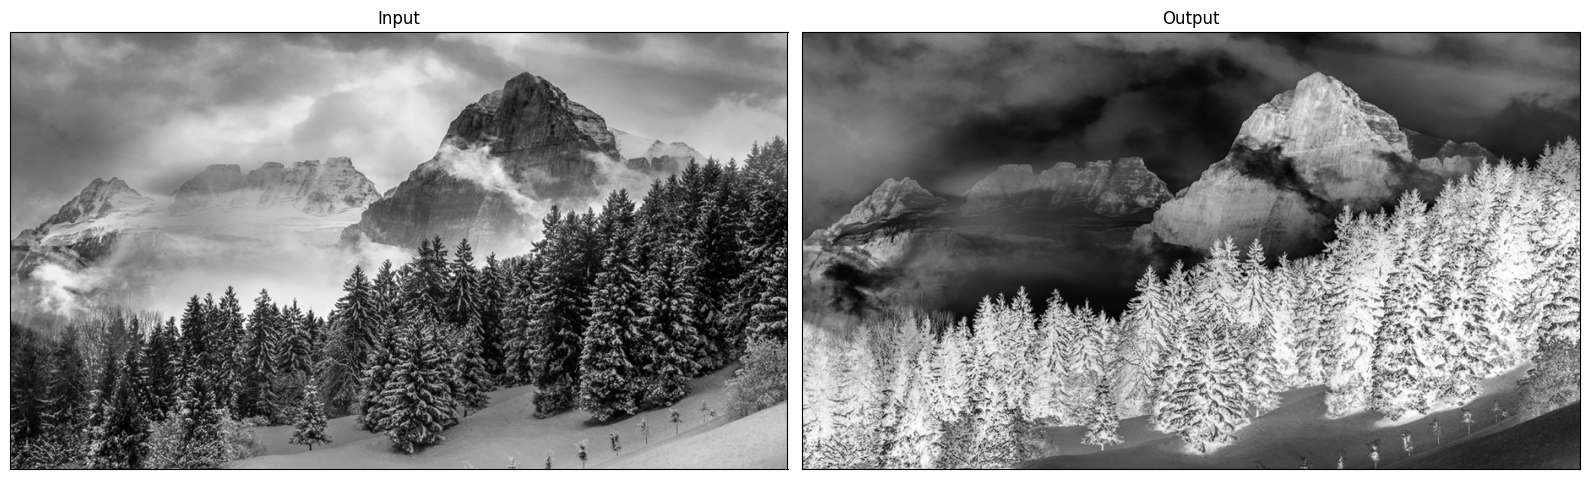

In [79]:
def intensity_inversion(image):
    return cv2.bitwise_not(image)

def gamma_correction(image, gamma=2.2):
    table = np.array([(i / 255.0) ** (1.0 / gamma) * 255 for i in range(256)]).astype("uint8")
    return cv2.LUT(image, table)
    
image = cv2.imread("Task1.jpg")
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# print(image.shape)
# print(image_gray)

inverted = intensity_inversion(image_gray)
gamma_corrected = gamma_correction(inverted, gamma=0.8)
fig, ax = plt.subplots(1, 2, figsize=(16, 9))
ax[0].imshow(image_gray, cmap='gray')
ax[0].set_title("Input")
ax[1].imshow(gamma_corrected, cmap='gray')
ax[1].set_title("Output")

for ax in ax:
    ax.set_xticks([])
    ax.set_yticks([])
    
plt.tight_layout()
plt.show()

2. By observing the image, we can see lots of black and white noise points, which accords with characteristic of salt-and-pepper noise. Among the three methods ( mean filtering, Gaussian filtering, and median filtering ),  median filtering should be chosen for noise removal of this image.It works by replacing the pixel value with the median of the local window, effectively removing isolated black and white noise points while preserving the edge details of the image and avoiding blurring. On the contrary, Gaussian filtering and mean filtering tend to spread the noise and blur the image.

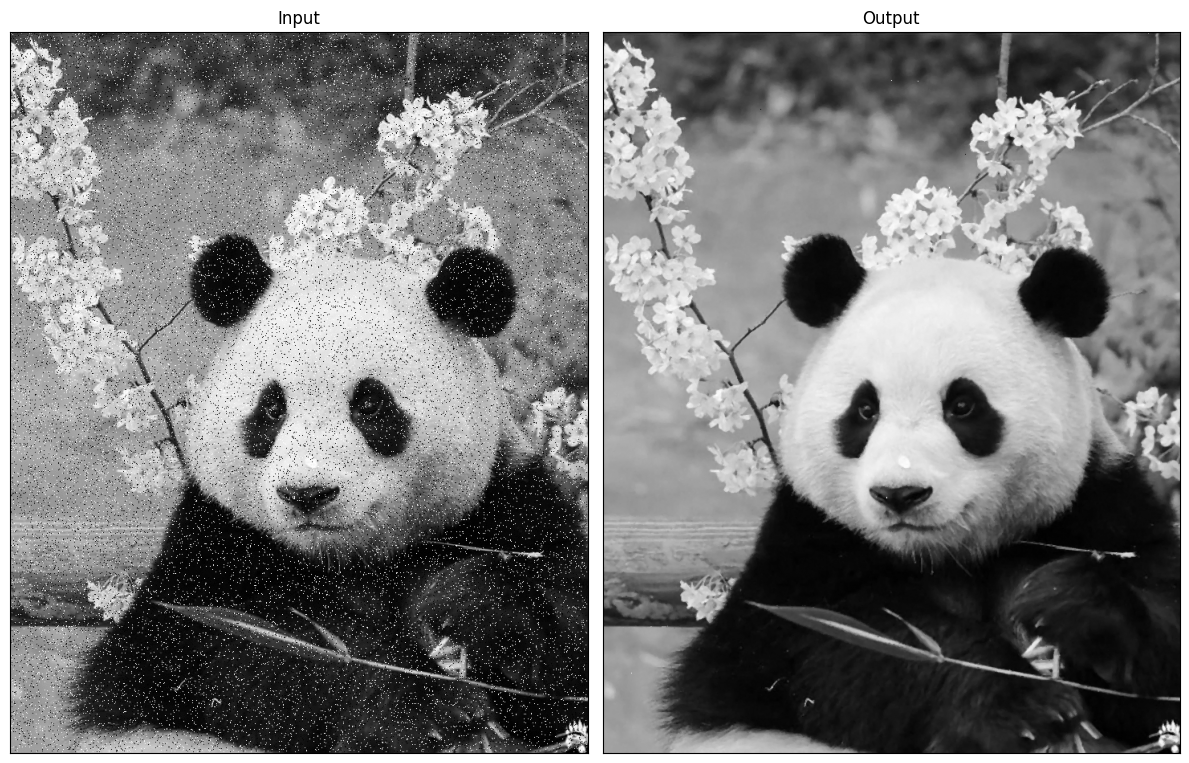

In [85]:
def apply_filtering(img, kernel_size):
    mean_filtered = cv2.blur(img, (kernel_size, kernel_size))  # Mean filter
    gaussian_filtered = cv2.GaussianBlur(img, (kernel_size, kernel_size), 0)  # Gaussian filter
    median_filtered = cv2.medianBlur(img, kernel_size)  # Median filter
    return median_filtered

image = cv2.imread("Task2.jpg", cv2.IMREAD_GRAYSCALE)
kernel_size = 3 # 3 5 7
median_filtered = apply_filtering(image, kernel_size)

fig, ax = plt.subplots(1, 2, figsize=(12, 9))
ax[0].imshow(image, cmap='gray')
ax[0].set_title("Input")
ax[1].imshow(median_filtered, cmap='gray')
ax[1].set_title("Output")

for ax in ax:
    ax.set_xticks([])
    ax.set_yticks([])
    
plt.tight_layout()
plt.show()

3. In this task, I used the Unsharp Masking image sharpening technique, which works by applying Gaussian blur to the original image and then enhance the edges by subtracting the blurred image from the original. This method can enhance contrast while keeping the overall structure of the image unchanged. The Laplacian sharpening method causes noise amplification when processing this image, blurring the image because it is more sensitive to noise despite its emphasis on edges.

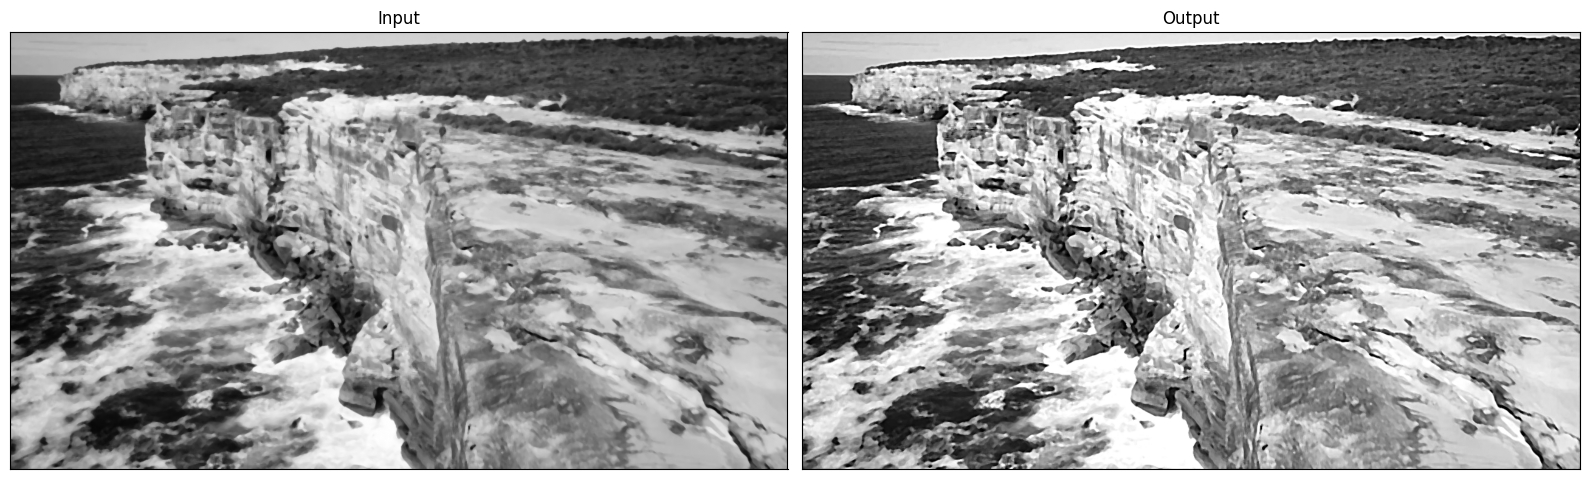

In [19]:
def sharpen_laplacian(image):
    laplacian = cv2.Laplacian(image, cv2.CV_64F)
    laplacian = np.clip(laplacian, 0, 255).astype(np.uint8)
    sharpened = cv2.addWeighted(image, 1.7, laplacian, -0.5, 0)
    return sharpened

def sharpen_unsharp_mask(image):
    gaussian_blur = cv2.GaussianBlur(image, (9,9), 10)
    sharpened = cv2.addWeighted(image, 2.2, gaussian_blur, -1.1, 0)
    return sharpened

image = cv2.imread("Task3.jpg", cv2.IMREAD_GRAYSCALE)
# laplacian_sharp = sharpen_laplacian(image)
unsharp_sharp = sharpen_unsharp_mask(image)

fig, ax = plt.subplots(1, 2, figsize=(16, 9))
ax[0].imshow(image, cmap='gray'); 
ax[0].set_title("Input")
# ax[1].imshow(laplacian_sharp, cmap='gray'); 
# ax[1].set_title("Laplacian Sharpened")
ax[1].imshow(unsharp_sharp, cmap='gray'); 
ax[1].set_title("Output")

for ax in ax:
    ax.set_xticks([])
    ax.set_yticks([])

plt.tight_layout()
plt.show()